In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext rpy2.ipython

This notebook contains Python and R code for reproducing the results in our paper on factors influencing student ratings of automatically generated questions:
                                                                                                                                       
Johnson, B. G., Dittel, J. S., & Van Campenhout, R. (2024). Investigating Student Ratings with Features of Automatically Generated Questions: A Large-Scale Analysis Using Data from Natural Learning Contexts. In B. Paaßen and C. D. Epp, editors, Proceedings of the 17th International Conference on Educational Data Mining, pp. 194–202, Atlanta, Georgia, USA, July 2024. International Educational Data Mining Society. https://educationaldatamining.org/edm2024/proceedings/2024.EDM-long-papers.16/index.html                                      
                                                                                                                                       
We are pleased and honored to have won the [Best Paper Award](https://educationaldatamining.org/edm2024/best-paper-awards/) at [Educational Data Mining 2024](https://educationaldatamining.org/edm2024/) for this work! Thank you, EDM!!

## Read sessions dataset

In [3]:
sessions = pd.read_parquet( 'sessions.parquet' )
sessions.head()

,student_id,question_id,thumbs_up,thumbs_down,H1_first_correct,H2_cumulative_answered,H3_spelling_suggestion,H4_sentence_textrank_rank,H5_answer_tf_idf_rank,H6_answer_pos,H7_answer_log_probability,H8_answer_location,H9_feedback,H10_reviewed
0,26EFUDCGXGK2R2BMUA65,000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab...,0,0,0,1,0,0.226576,0.011482,NOUN,-13.244523,9,outcome,0
1,AK53WK5B75TBJXS7MMSM,000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab...,0,0,0,1,0,0.226576,0.011482,NOUN,-13.244523,9,outcome,0
2,VGEWC8NNTPF6ZNP2XGDM,000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab...,0,0,0,1,0,0.226576,0.011482,NOUN,-13.244523,9,outcome,0
3,35QFXU45PTMQP8PXPZH8,0000078ca057d9d241313d8e375c22d2f051f9cb344aa8...,0,0,0,1,0,0.401515,0.102564,NOUN,-10.910631,3,outcome,0
4,A7868K7YXB2BJKUEV8BS,0000078ca057d9d241313d8e375c22d2f051f9cb344aa8...,0,0,1,1,0,0.401515,0.102564,NOUN,-10.910631,3,outcome,0


## Exploratory data analysis

Total number of sessions, questions, and students.

In [4]:
len( sessions ), sessions.question_id.nunique(), sessions.student_id.nunique()

(5214211, 809848, 432930)

Total number of ratings and ratings per 1,000 sessions.

In [5]:
sessions[ 'thumbs_up thumbs_down'.split() ].sum()

thumbs_up      17285
thumbs_down    10434
dtype: int64

In [6]:
( sessions[ 'thumbs_up thumbs_down'.split() ].mean() * 1000 ).round( 2 )

thumbs_up      3.31
thumbs_down    2.00
dtype: float64

### Table 3. Ratings per 1,000 sessions for categorical variable levels.

In [7]:
def ratings_per_1000_sessions( sessions, variable ):
    return sessions.groupby( variable ).agg(
        sessions=( 'thumbs_up', 'count' ),
        thumbs_up=( 'thumbs_up', lambda g: g.mean() * 1000 ),
        thumbs_down=( 'thumbs_down', lambda g: g.mean() * 1000 )
    ).round( 2 )

In [8]:
ratings_per_1000_sessions( sessions, 'H1_first_correct' )

,sessions,thumbs_up,thumbs_down
H1_first_correct,,,
0,2292927,2.91,3.04
1,2921284,3.63,1.19


In [9]:
ratings_per_1000_sessions( sessions, 'H3_spelling_suggestion' )

,sessions,thumbs_up,thumbs_down
H3_spelling_suggestion,,,
0,4926209,3.30,2.05
1,288002,3.59,1.12


In [10]:
ratings_per_1000_sessions( sessions, 'H6_answer_pos' )

,sessions,thumbs_up,thumbs_down
H6_answer_pos,,,
ADJ,1509164,3.38,1.76
ADV,52541,2.70,5.23
NOUN,3207347,3.35,1.96
PROPN,247666,3.01,2.23
VERB,197493,2.86,3.43


In [11]:
ratings_per_1000_sessions( sessions, 'H9_feedback' )

,sessions,thumbs_up,thumbs_down
H9_feedback,,,
common_answer,3299873,3.28,1.68
context,477814,3.45,2.55
outcome,1436524,3.35,2.55


In [12]:
ratings_per_1000_sessions( sessions, 'H10_reviewed' )

,sessions,thumbs_up,thumbs_down
H10_reviewed,,,
0,4915386,3.34,2.03
1,298825,2.86,1.54


### Additional exploratory data analysis: Ratings per 1,000 sessions for continuous variables.

Not included in the original paper due to space limitations. Plot means per decile.

In [13]:
def ratings_per_1000_sessions_continuous( sessions, variable ):
    sessions.groupby( pd.qcut( sessions[ variable ], 10 ) ).agg(
        thumbs_up=( 'thumbs_up', lambda g: g.mean() * 1000 ),
        thumbs_down=( 'thumbs_down', lambda g: g.mean() * 1000 )
    ).plot( figsize=( 9, 6 ), color='g r'.split() )
    plt.ylabel( 'Ratings per 1,000 Sessions' )

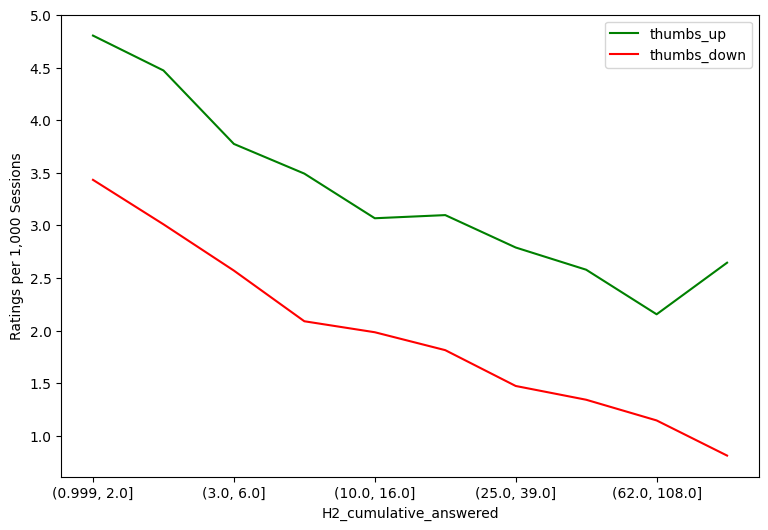

In [14]:
ratings_per_1000_sessions_continuous( sessions, 'H2_cumulative_answered' )

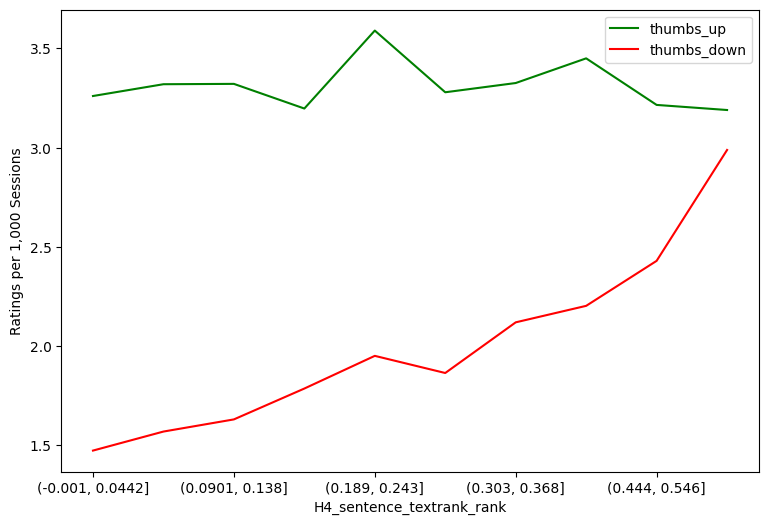

In [15]:
ratings_per_1000_sessions_continuous( sessions, 'H4_sentence_textrank_rank' )

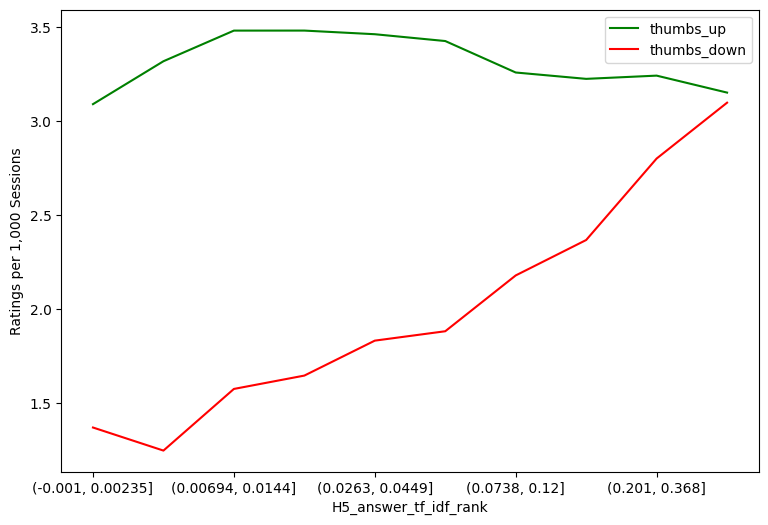

In [16]:
ratings_per_1000_sessions_continuous( sessions, 'H5_answer_tf_idf_rank' )

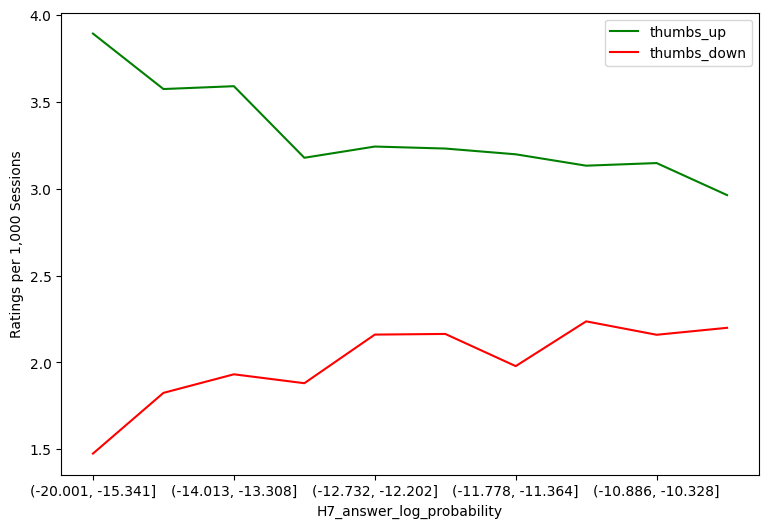

In [17]:
ratings_per_1000_sessions_continuous( sessions, 'H7_answer_log_probability' )

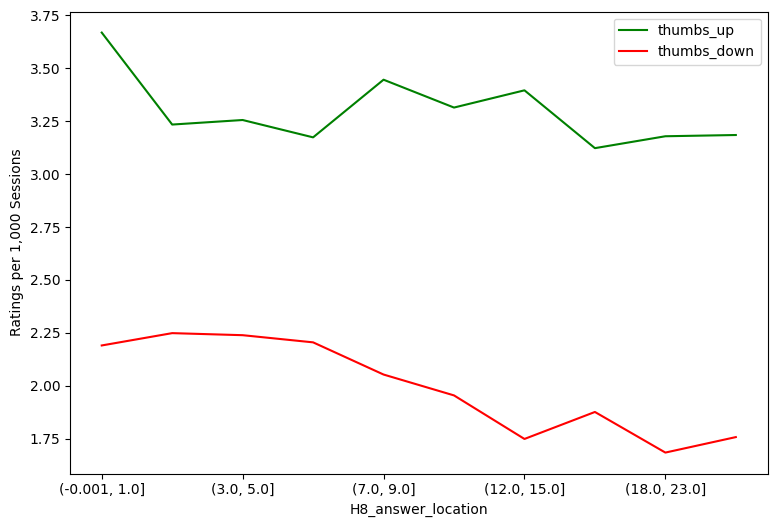

In [18]:
ratings_per_1000_sessions_continuous( sessions, 'H8_answer_location' )

## Explanatory models

Notes:

* Mixed effects regression models that are typically used to address lack of independence in observations in the data set (here, multiple observations per question and per student) are generally much more computationally expensive to fit than ordinary fixed effects models. The data set in this work was too large to run mixed effects regression with random intercepts for both questions and students. It was therefore investigated whether this was essential to obtaining accurate modeling results. It was determined that a mixed effects model with random intercepts for questions only was sufficient. More details on this issue are discussed in our paper.
* In our paper, all regressions were performed using R version 4.1.2 with package glmmTMB version 1.1.8 for mixed effects models. In this notebook, R version 4.4.1 and glmmTMB version 1.1.9 were used. Slight differences in numerical results may be observed in some cases.

In [19]:
%%R
library( arrow )
library( glmmTMB )

Some features are not enabled in this build of Arrow. Run `arrow_info()` for more information.
The repository you retrieved Arrow from did not include all of Arrow's features.
You can install a fully-featured version by running:
`install.packages('arrow', repos = 'https://apache.r-universe.dev')`.

Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp



In [20]:
%%R
df <- read_parquet( 'sessions.parquet' )
str( df )

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	5214211 obs. of  14 variables:
 $ student_id               : chr  "26EFUDCGXGK2R2BMUA65" "AK53WK5B75TBJXS7MMSM" "VGEWC8NNTPF6ZNP2XGDM" "35QFXU45PTMQP8PXPZH8" ...
 $ question_id              : chr  "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "000005fcee0aca01fd16f0fcaebbd46bbcef1131bdedab888522e6de2ced78c8" "0000078ca057d9d241313d8e375c22d2f051f9cb344aa8aeea685d936d138887" ...
 $ thumbs_up                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thumbs_down              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ H1_first_correct         : int  0 0 0 0 1 1 1 0 0 1 ...
 $ H2_cumulative_answered   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ H3_spelling_suggestion   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ H4_sentence_textrank_rank: num  0.227 0.227 0.227 0.402 0.402 ...
 $ H5_answer_tf_idf_rank    : num  0.0115 0.0115 0.0115 0.1026 0.1026 ...
 $ H6_answer_pos            : chr  "NOUN" "NOUN" "N

### Table 4. Thumbs down regression model.

In [21]:
%%R
model <- glmmTMB( thumbs_down ~ H1_first_correct
                              + H2_cumulative_answered
                              + H3_spelling_suggestion
                              + H4_sentence_textrank_rank
                              + H5_answer_tf_idf_rank
                              + H6_answer_pos
                              + H7_answer_log_probability
                              + H8_answer_location
                              + H9_feedback
                              + H10_reviewed
                              + (1|question_id),
                              family=binomial(link=logit), data=df )
summary( model )

 Family: binomial  ( logit )
Formula:          
thumbs_down ~ H1_first_correct + H2_cumulative_answered + H3_spelling_suggestion +  
    H4_sentence_textrank_rank + H5_answer_tf_idf_rank + H6_answer_pos +  
    H7_answer_log_probability + H8_answer_location + H9_feedback +  
    H10_reviewed + (1 | question_id)
Data: df

      AIC       BIC    logLik  deviance  df.resid 
 123135.6  123351.1  -61551.8  123103.6   5214195 

Random effects:

Conditional model:
 Groups      Name        Variance Std.Dev.
 question_id (Intercept) 66.57    8.159   
Number of obs: 5214211, groups:  question_id, 809848

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.076e+01  2.078e-01  -51.76  < 2e-16 ***
H1_first_correct          -8.229e-01  2.625e-02  -31.35  < 2e-16 ***
H2_cumulative_answered    -6.095e-03  3.601e-04  -16.92  < 2e-16 ***
H3_spelling_suggestion    -4.666e-01  6.576e-02   -7.10 1.29e-12 ***
H4_sentence_textrank_rank  8.653e-

### Table 5. Bayesian information criterion decreases for single-variable thumbs down models.

In [22]:
%%R
model <- glm( thumbs_down ~ 1,
              family=binomial(link=logit), data=df )
bic_intercept <- BIC( model )
bic_intercept

[1] 150537.9


In [23]:
%%R
model <- glm( thumbs_down ~ H1_first_correct,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -2190.152


In [24]:
%%R
model <- glm( thumbs_down ~ H2_cumulative_answered,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -1179.696


In [25]:
%%R
model <- glm( thumbs_down ~ H3_spelling_suggestion,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -125.0295


In [26]:
%%R
model <- glm( thumbs_down ~ H4_sentence_textrank_rank,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -480.3125


In [27]:
%%R
model <- glm( thumbs_down ~ H5_answer_tf_idf_rank,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -512.15


In [28]:
%%R
model <- glm( thumbs_down ~ H6_answer_pos,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -351.3891


In [29]:
%%R
model <- glm( thumbs_down ~ H7_answer_log_probability,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -100.0393


In [30]:
%%R
model <- glm( thumbs_down ~ H8_answer_location,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -74.98735


In [31]:
%%R
model <- glm( thumbs_down ~ H9_feedback,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -414.7528


In [32]:
%%R
model <- glm( thumbs_down ~ H10_reviewed,
              family=binomial(link=logit), data=df )
BIC( model ) - bic_intercept

[1] -20.5868


### Table 6. Thumbs up regression model.

In [33]:
%%R
model <- glmmTMB( thumbs_up ~ H1_first_correct
                            + H2_cumulative_answered
                            + H3_spelling_suggestion
                            + H4_sentence_textrank_rank
                            + H5_answer_tf_idf_rank
                            + H6_answer_pos
                            + H7_answer_log_probability
                            + H8_answer_location
                            + H9_feedback
                            + H10_reviewed
                            + (1|question_id),
                            family=binomial(link=logit), data=df )
summary( model )

 Family: binomial  ( logit )
Formula:          
thumbs_up ~ H1_first_correct + H2_cumulative_answered + H3_spelling_suggestion +  
    H4_sentence_textrank_rank + H5_answer_tf_idf_rank + H6_answer_pos +  
    H7_answer_log_probability + H8_answer_location + H9_feedback +  
    H10_reviewed + (1 | question_id)
Data: df

      AIC       BIC    logLik  deviance  df.resid 
 210442.2  210657.7 -105205.1  210410.2   5214195 

Random effects:

Conditional model:
 Groups      Name        Variance Std.Dev.
 question_id (Intercept) 46.5     6.819   
Number of obs: 5214211, groups:  question_id, 809848

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.117e+01  1.469e-01  -76.05  < 2e-16 ***
H1_first_correct           2.747e-01  1.865e-02   14.73  < 2e-16 ***
H2_cumulative_answered    -4.414e-04  1.597e-04   -2.76  0.00570 ** 
H3_spelling_suggestion     4.730e-02  3.720e-02    1.27  0.20352    
H4_sentence_textrank_rank  4.384e-02